# KNN 分类

In [14]:
# 1.工具包
from sklearn.neighbors import KNeighborsClassifier

# 2.数据（特征处理）
x = [[0],[1],[2],[3],[4]]
y = [0,0,1,1,1]

# 3.实例化
model = KNeighborsClassifier(n_neighbors=3) # 二分类，避免设置成2的倍数

# 4.训练
model.fit(x,y)

# 5.预测
print(model.predict([[5]])) # 输出[1]

[1]


# KNN 回归

In [15]:
# 1.工具包
from sklearn.neighbors import KNeighborsRegressor

# 2.数据（特征工程）
x = [[0],[1],[2],[3]]
y = [0.1,0.2,0.3,0.4]  # 目标值是连续的

# 3.实例化
model = KNeighborsRegressor(n_neighbors=3)

# 4.训练
model.fit(x,y)

# 5.预测
print(model.predict([[5]])) # 输出[0.3]

[0.3]


# 特征预处理

## 归一化

In [26]:
from sklearn.preprocessing import MinMaxScaler

# 2.数据（只有特征）
x = [[90,2,10,40],[60,4,15,45],[75,3,13,46]]

# 3.实例化
process = MinMaxScaler()

# 4.fit_transform处理
data = process.fit_transform(x)
print(data)

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]


## 标准化

In [27]:
from sklearn.preprocessing import StandardScaler

# 2.数据（只有特征）
x = [[90,2,10,40],[60,4,15,45],[75,3,13,46]]

# 3.实例化
process = StandardScaler()

# 4.fit_transform处理
data = process.fit_transform(x)

print(data)
print(process.mean_)
print(process.var_)

[[ 1.22474487 -1.22474487 -1.29777137 -1.3970014 ]
 [-1.22474487  1.22474487  1.13554995  0.50800051]
 [ 0.          0.          0.16222142  0.88900089]]
[75.          3.         12.66666667 43.66666667]
[150.           0.66666667   4.22222222   6.88888889]


# KNN算法——鸢尾花分类

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

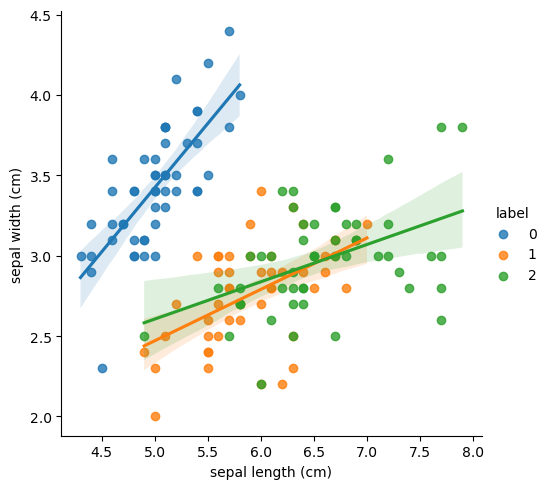

In [23]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 加载数据集
iris_data = load_iris()
print(iris_data)
print('-'*50)
print(iris_data.target)

# 数据展示
iris_df = pd.DataFrame(iris_data['data'],columns=iris_data.feature_names)
iris_df['label'] = iris_data.target
print(iris_data.feature_names)
sns.lmplot(x = 'sepal length (cm)', y = 'sepal width (cm)', data = iris_df, hue = 'label')
plt.show()

# 特征工程（预处理加标准化）
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.3, random_state=22)

std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

# 模型训练
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, x_test)

# 模型预测
x = [[5.1,3.5,1.4,0.2]]
x = std.transform(x)
y_pre = model.predict(x_test)
print(model.predict_proba(x))

# 模型评估
acc =accuracy_score(y_test,y_pre)
print(acc)

# 6.2 直接计算
acc = model.score(x_test,y_test)
print(acc)

# 超参数选择——网格搜索交叉验证

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 1.加载数据
data = load_iris()

# 2.数据集划分
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, random_state=22)

# 3.特征预处理
pre = StandardScaler()
x_train = pre.fit_transform(x_train)
x_test = pre.fit_transform(x_test)

# 4.模型实例化+交叉验证+网格搜索
model = KNeighborsClassifier(n_neighbors=1)
paras_grid = {'n_neighbors':[4,5,7,9]}
# paras_grid = {'n_neighbors':[4,5,7,9],'lr':[1,2,3,4],'mo':[0.1,0.2,0.3]}  4,1,0.1  4,1,0.2这样一个一个组合进行交叉验证
estimator = GridSearchCV(estimator=model, param_grid=paras_grid, cv=4)
estimator.fit(x_train, y_train)

print(estimator.best_score_)
print(estimator.best_estimator_)
print(estimator.cv_results_)

0.9666666666666668
KNeighborsClassifier(n_neighbors=7)
{'mean_fit_time': array([0.00121874, 0.00109398, 0.00115907, 0.00062251]), 'std_fit_time': array([0.00021632, 0.00077884, 0.00050877, 0.00043365]), 'mean_score_time': array([0.0044781 , 0.0047369 , 0.00409132, 0.00410604]), 'std_score_time': array([0.00044659, 0.00086951, 0.00048759, 0.00050129]), 'param_n_neighbors': masked_array(data=[4, 5, 7, 9],
             mask=[False, False, False, False],
       fill_value=999999), 'params': [{'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 7}, {'n_neighbors': 9}], 'split0_test_score': array([1., 1., 1., 1.]), 'split1_test_score': array([0.96666667, 0.96666667, 0.96666667, 0.96666667]), 'split2_test_score': array([0.9       , 0.93333333, 0.93333333, 0.93333333]), 'split3_test_score': array([0.9       , 0.93333333, 0.96666667, 0.93333333]), 'mean_test_score': array([0.94166667, 0.95833333, 0.96666667, 0.95833333]), 'std_test_score': array([0.04330127, 0.02763854, 0.02357023, 0.0276385

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# 1.加载数据
data = load_iris()

# 2.数据集划分
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.2, random_state=22)

# 3.特征预处理
pre = StandardScaler()
x_train = pre.fit_transform(x_train)
x_test = pre.fit_transform(x_test)

# 4.模型实例化+交叉验证+网格搜索
model = KNeighborsClassifier(n_neighbors=1)
# paras_grid = {'n_neighbors':[4,5,7,9]}
# estimator = GridSearchCV(estimator=model, param_grid=paras_grid, cv=4)
# estimator.fit(x_train, y_train)
#
# print(estimator.best_score_)
# print(estimator.best_estimator_)
# print(estimator.cv_results_)

from sklearn.metrics import accuracy_score
# 经上面结果，最好的n_neighbors=7
model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train, y_train)
x = [[5.1,3.5,1.4,0.2]]
x = pre.fit_transform(x)
y_predict = model.predict(x_test)
print('准确率--->', accuracy_score(y_test, y_predict)) # KNeighborsClassifier(n_neighbors=7)

准确率---> 0.7666666666666667
